# SNT - S04 - 3 TP Python  : Modélisation d'un réseau social

<img src="https://www.4stars.it/blog/wp-content/uploads/2019/07/lavoro-su-i-social.jpg" alt="Kitten" title="social network" />

Pour commencer, exécutez le script suivant pour importer deux modules qui nous seront nécessaires pendant tout le TP.

In [ ]:
# importation du module "matplotlib" pour créer des graphiques
import matplotlib.pyplot as plt
# importation du module "networkx" pour simuler un réseau social
import networkx as nx

## 1) Introduction

 Imaginez un réseau social ayant 6 abonnés (A, B, C, D, E et F) où :

    A est ami avec B, C et D
    B est ami avec A et D
    C est ami avec A, E et D
    D est ami avec tous les autres abonnés
    E est ami avec C, D et F
    F est ami avec E et D

La description de ce réseau social, malgré son faible nombre d'abonnés, est déjà quelque peu rébarbative, alors imaginez cette même description avec un réseau social comportant des millions d'abonnés !

Il existe un moyen plus "visuel" pour représenter ce réseau social : on peut représenter chaque abonné par un cercle (avec le nom de l'abonné situé dans le cercle) et chaque relation "X est ami avec Y" par un segment de droite reliant X et Y ("X est ami avec Y" et "Y est ami avec X" étant représenté par le même segment de droite).

Voici ce que cela donne avec le réseau social décrit ci-dessus :
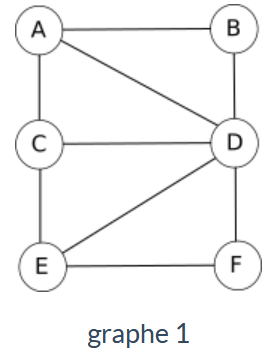

Ce genre de figure s'appelle un **graphe**. Les graphes sont des objets mathématiques très utilisés, notamment en informatique. Les cercles sont appelés des **sommets** et les segments de droites des **arêtes**.

### Exercice 1

Construisez sur une feuille un graphe de réseau social à partir des informations suivantes :

    A est ami avec B et E
    B est ami avec A et C
    C est ami avec B,F et D
    D est ami avec C,F et E
    E est ami avec A,D et F
    F est ami avec C, D et E
    
### Voici quelques définitions  à connaitre sur les graphes :

- **chaîne** : Dans un graphe, une chaîne reliant un sommet x à un sommet y est définie par une suite finie d'arêtes consécutives, reliant x à y.

    exemple : Dans le graphe donné ci-dessus (graphe 1), A-D-E-C est une chaîne

- **distance entre 2 sommets** : La distance entre deux sommets d'un graphe est le nombre minimum d'arêtes d'une chaîne allant de l'un à l'autre.

        exemple : 
        La distance entre le sommet A (graphe 1) et le sommet F est de 2 (chaîne A-D-F). 
        ATTENTION : on parle bien du nombre minimum d'arêtes, A-D-E-F est aussi une chaîne entre A et F mais dans ce cas, nous avons 3 arêtes.
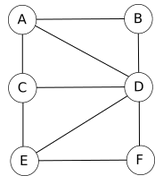

- **excentricité** : L'excentricité d'un sommet est la distance maximale existant entre ce sommet et les autres sommets du graphe.

         exemple 1 : 
         Toujours dans le graphe 1 : distance (A-B) = 1 ; distance (A-C) = 1 ; distance (A-D) = 1 ; distance (A-E) = 2 ; distance (A-F) = 2 ; nous pouvons donc dire que la distance maximale existant entre le sommet A et les autres sommets du graphe est de 2 (distance (A-E) et distance (A-F)). Nous pouvons donc dire que l'excentricité de A est de 2.

        exemple 2 : 
        distance (D-A) = 1 ; 
        distance (D-B) = 1 ; 
        distance (D-C) = 1 ; 
        distance (D-E) = 1 ; 
        distance (D-F) = 1 ; nous pouvons donc dire que l'excentricité de D est de 1.
     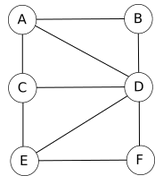

- **centre** : On appelle centre d'un graphe, le sommet d'excentricité minimale (le centre n'est pas nécessairement unique).

        exemple : Dans le graphe 1 tous les sommets ont une excentricité de 2 à l'exception du sommet D qui a une excentricité de 1, nous pouvons donc affirmer que le centre du graphe 1 est le sommet D
     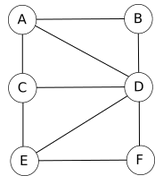

- **rayon** : On appelle rayon d'un graphe G, l'excentricité d'un centre de G.

        exemple : D a une excentricité de 1, c'est le centre du graphe 1, nous pouvons donc dire que le rayon du graphe 1 est de 1.
     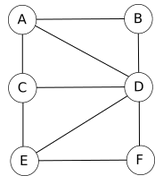

- **diamètre** : On appelle diamètre d'un graphe G, la distance maximale entre deux sommets du graphe G. 

        exemple : Dans le graphe 1 la distance maximale entre 2 sommets est de 2, nous pouvons donc dire que le diamètre du graphe est de 2.
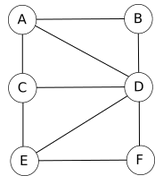



### Exercice 2

Soit le graphe suivant : 
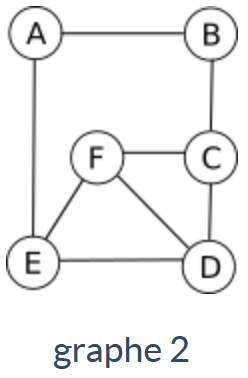
Déterminez le (ou les) centre(s) du graphe 2, en déduire le rayon du graphe 2. Déterminez le diamètre du graphe 2. 

# 2) Simulation d'un graphe
Exécuter plusieurs fois le script Python ci-dessous (sans chercher pour le moment à en comprendre le code) :

In [ ]:
G = nx.random_geometric_graph(200, 0.125)
pos = nx.get_node_attributes(G, 'pos')
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d
p = dict(nx.single_source_shortest_path_length(G, ncenter))
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### **Exercice 3** : 
Expliquer pourquoi la figure générée nous permet de modéliser un réseau social.

*---> votre réponse dans cette cellule...*

## 3) Découverte du module networkx

Simulons un réseau social avec le module Python `networkx`.

Lire puis exécuter plusieurs fois le code suivant :

In [ ]:
# création d'un graphe vide non orienté appelé "monReseau"
monReseau = nx.Graph()

monReseau.add_node("Audrey")
monReseau.add_node("Nicolas")
monReseau.add_node("Alexis")
monReseau.add_node("Hélène")

# dessine (draw) et affiche (show) le graphe "monReseau"
nx.draw(monReseau, with_labels=True)
plt.show()

print("Nombre de personnes =", monReseau.number_of_nodes())

### **Exercice 4** : 
Que fait le code de la ligne 6 : `monReseau.add_node("Alexis")` ?

*---> votre réponse dans cette cellule...*

Lire puis exécuter plusieurs fois le code suivant :

In [ ]:
monReseau = nx.Graph()

monReseau.add_node("Audrey")
monReseau.add_node("Nicolas")
monReseau.add_node("Alexis")
monReseau.add_node("Hélène")

monReseau.add_edge("Audrey", "Nicolas")
monReseau.add_edge("Audrey", "Alexis")
monReseau.add_edge("Nicolas", "Alexis")
monReseau.add_edge("Hélène", "Audrey")
monReseau.add_edge("Hélène", "Nicolas")

nx.draw(monReseau, with_labels=True)
plt.show()

print("Nombre de personnes =", monReseau.number_of_nodes())
print("Nombre de liens =", monReseau.number_of_edges())

### **Exercice 5** : 
Que fait le code de la ligne 8 : `monReseau.add_edge("Audrey","Nicolas")` ?

*---> votre réponse dans cette cellule...*

### **Exercice 6** : 
Quelles sont les deux personnes qui ne sont pas directement en relation ? Que faudrait-il faire pour les mettre en relation ?

*---> votre réponse dans cette cellule...*

# 4) Un graphe orienté

Lire puis exécuter plusieurs fois le code suivant, qui est presque le même que le code précédent :

In [ ]:
monReseau = nx.DiGraph() # création d'un graphe orienté

monReseau.add_node("Audrey")
monReseau.add_node("Nicolas")
monReseau.add_node("Alexis")
monReseau.add_node("Hélène")

monReseau.add_edge("Audrey", "Nicolas")  # lien de Audrey vers Nicolas
monReseau.add_edge("Audrey", "Alexis")
monReseau.add_edge("Nicolas", "Alexis")
monReseau.add_edge("Hélène", "Audrey")
monReseau.add_edge("Hélène", "Nicolas")
monReseau.add_edge("Alexis", "Audrey")

nx.draw(monReseau, with_labels=True)
plt.show()

print("Nombre de personnes =", monReseau.number_of_nodes())
print("Nombre de liens =", monReseau.number_of_edges())

### **Exercice 7** : 
Qu'est-ce qui a changé par rapport au graphe précédent ?

*---> votre réponse dans cette cellule...*

### **Exercice 8** : 
Pourquoi la relation entre Audrey et Alexis est-elle différente des autres ? Pourquoi voit-on 5 segments mais 6 liens ?

*---> votre réponse dans cette cellule...*

### **Exercice 9** : 
Ce dernier graphe est dit **orienté**, par opposition au graphe du paragraphe précédent qui est dit **non orienté**. Parmi Facebook, Twitter, Instagram, WhatsApp, Snapchat, citer un réseau social orienté et un réseau social non orienté.

*---> votre réponse dans cette cellule...*

# 5) Mon petit réseau social

### **Exercice 10** :
Choisir six prénoms de votre choix et simuler graphiquement un réseau social **non orienté** entre ces personnes, à l'aide du code appris précédemment.

In [ ]:
# votre code ici
...
pass

# 6) Un réseau social où tout le monde est amis

Lire puis exécuter plusieurs fois le programme suivant.

In [ ]:
monRezo = nx.Graph()

Liste = ["Ronaldo", "Messi", "Totti", "Salah", "Mbappé", "Neymar"]

for a in Liste:
    monRezo.add_node(a)

for b in Liste:
    for c in Liste:
        monRezo.add_edge(b, c)

nx.draw(monRezo, with_labels = True)
plt.show()

print("Nombre de personnes =", monRezo.number_of_nodes())
print("Nombre de liens =", monRezo.number_of_edges())

### **Exercice 11** : 
Expliquer ce que font les lignes 8, 9 et 10 du programme.

*---> votre réponse dans cette cellule...*

# 7 Un réseau social plus ou moins social

La fonction `random()` renvoie un nombre réel au hasard entre 0 et 1.

Lire puis exécutez plusieurs fois de suite le programme suivant :

In [ ]:
from random import random

monRezo = nx.Graph()

Liste = ["Ronaldo", "Messi", "Totti", "Salah", "Pogba", "Neymar"]
p = 0.3

for a in Liste:
    monRezo.add_node(a)

for b in Liste:
    for c in Liste:
        if random() < p:
            monRezo.add_edge(b, c)

nx.draw(monRezo, with_labels = True)
plt.show()

print("Nombre de personnes =", monRezo.number_of_nodes())
print("Nombre de liens =", monRezo.number_of_edges())

### **Exercice 12** : 
Par défaut `p = 0.3` (ligne 6 du programme). Donnez à `p` la valeur `0.1` puis exécutez plusieurs fois le programme. Donnez à `p` la valeur `0.9` puis exécutez plusieurs fois le programme. Que constatez-vous ? Pourquoi ?

*---> votre réponse dans cette cellule...*

# 8) D'autres réseaux ?

**Bonus** : Nous venons de simuler un réseau social avec le module Python `networkx`. Quels autres types de réseaux pourrait-on modéliser avec `networkx` ?

*---> votre réponse dans cette cellule...*